C:\Users\PieHu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Loss for model trained on f(x): 7688.544921875
Loss for model trained on f(x) and f_mirror(x): 26231.599609375


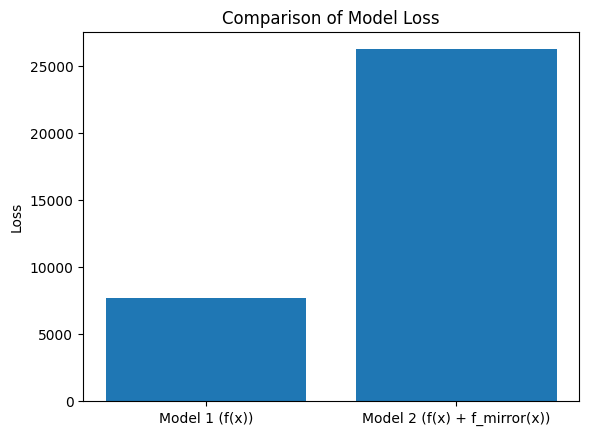

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Generate data
def generate_data(num_samples=1000):
    x = np.linspace(-10, 10, num_samples)  # Generating x values
    y = np.array([x, x**2, x**3]).T  # y = f(x) = [x, x^2, x^3]
    y_mirror = np.array([x**3, x**2, x]).T  # y_mirror = f_mirror(x) = [x^3, x^2, x]
    return x, y, y_mirror

# Step 2: Define model architecture
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=1, activation='relu'))
    model.add(Dense(3))  # Output layer with 3 units (x, x^2, x^3)
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Step 3: Train and evaluate models
def train_and_evaluate():
    # Generate data
    x, y, y_mirror = generate_data()

    # Version 1: Train on original y = f(x)
    model1 = create_model()
    model1.fit(x, y, epochs=100, batch_size=32, verbose=0)

    # Version 2: Train on both y = f(x) and y_mirror = f_mirror(x)
    x_combined = np.concatenate([x, x], axis=0)
    y_combined = np.concatenate([y, y_mirror], axis=0)
    
    model2 = create_model()
    model2.fit(x_combined, y_combined, epochs=100, batch_size=32, verbose=0)

    # Step 4: Evaluate loss on a test set
    x_test = np.linspace(-10, 10, 100)  # Test data
    y_test = np.array([x_test, x_test**2, x_test**3]).T
    y_mirror_test = np.array([x_test**3, x_test**2, x_test]).T

    loss1 = model1.evaluate(x_test, y_test, verbose=0)
    loss2 = model2.evaluate(x_test, y_test, verbose=0)

    # Step 5: Plot the results and compare losses
    print(f"Loss for model trained on f(x): {loss1}")
    print(f"Loss for model trained on f(x) and f_mirror(x): {loss2}")

    return loss1, loss2

# Run the test
loss1, loss2 = train_and_evaluate()

# Optionally, plot the loss comparison
plt.bar(["Model 1 (f(x))", "Model 2 (f(x) + f_mirror(x))"], [loss1, loss2])
plt.ylabel("Loss")
plt.title("Comparison of Model Loss")
plt.show()
